
# Project 2: Investigate the TMDB movies dataset:

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we will explore the data gathered from Kaggle (the cleaned version provided by Udacity). The data has information about more than 10000 movies, the number of votes, budget, and revenue of the movies, director and cast of the movies,..etc. The goal of this project is to get an idea of what factors can play a role in making movies more profitable and likable from the viewers. During my EDA I tried to answer the question below :
 
> * Which type of movies is the most-watched from year to year?
> * What types of movies are associated with a higher rating?
> * What kind of properties are associated with movies that have high revenue?
> * Which actors had made the most number of appearances


First, let's start by importing all the needed packages and of course the 'magic word' so that our visualizations are plotted.

In [92]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [95]:
# Loading up the data and printing out the first 5 lines.
df_movies= pd.read_csv(r"C:\Users\hp\Desktop\Akram Folder\DATABASE\UDACITY\Project 2 - Analyze Experiment Results\tmdb-movies.csv")
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [93]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       


### Data Cleaning 

>We Have 10866 rows and 21 columns in this dataset, with multiple missing data in many columns, we will start our wrangling process by dropping unnecessary columns for our EDA, then, removing any duplicated and null data, and by the end, we convert data type for some of the columns in order to make the processing phase much easier.

#### 1.Deleting unecessary columns 

In [97]:
#droping all the colums not needed for my EDA 
#Release_date column is not necessary since we have the release year in different column 
Columns_to_Drop = ['imdb_id', 'homepage', 'tagline', 'overview', 'production_companies','director', 'keywords', 'release_date']
df_movies.drop(Columns_to_Drop, axis=1, inplace=True)

In [98]:
#cheking the results 
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   budget          10866 non-null  int64  
 3   revenue         10866 non-null  int64  
 4   original_title  10866 non-null  object 
 5   cast            10790 non-null  object 
 6   runtime         10866 non-null  int64  
 7   genres          10843 non-null  object 
 8   vote_count      10866 non-null  int64  
 9   vote_average    10866 non-null  float64
 10  release_year    10866 non-null  int64  
 11  budget_adj      10866 non-null  float64
 12  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.1+ MB


#### 2. Removing duplicated data

In [68]:
#checking for any duplicated data 
df_movies.duplicated().sum()


1

In [92]:
#checking the results after droping the duplicated row
df_movies.drop_duplicates(inplace=True)
df_movies.duplicated().sum()

0

**Note**:  It came to my attention to check if there are any duplicated movies, and I found 294 duplicates that for better use of my data I will get rid of them.

In [95]:
 df_movies['original_title'].duplicated().sum()

294

In [97]:
#Droping the duplicates in 'Original_Title' column 
df_movies['original_title'].drop_duplicates(inplace= True)

In [98]:
 df_movies['original_title'].duplicated().sum()

0

#### 3. Deleting Null data

In [99]:
# droping missing values rows
df_movies.dropna(inplace=True)
#Checking the results
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10768 non-null  int64  
 1   popularity      10768 non-null  float64
 2   budget          10768 non-null  int64  
 3   revenue         10768 non-null  int64  
 4   original_title  10768 non-null  object 
 5   cast            10768 non-null  object 
 6   runtime         10768 non-null  int64  
 7   genres          10768 non-null  object 
 8   vote_count      10768 non-null  int64  
 9   vote_average    10768 non-null  float64
 10  release_year    10768 non-null  int64  
 11  budget_adj      10768 non-null  float64
 12  revenue_adj     10768 non-null  float64
dtypes: float64(4), int64(6), object(3)
memory usage: 1.2+ MB


#### 4. Changing datatype:

>release_year and runtime columns contain fixed values, so changing the datatype to 'String' will make the processing of the data much easier.

In [101]:
#converting the datatype of release_year and runtime columns 
df_movies['release_year']=df_movies['release_year'].astype(str)
df_movies['runtime']=df_movies['runtime'].astype(str)
#checking the results
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10768 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10768 non-null  int64  
 1   popularity      10768 non-null  float64
 2   budget          10768 non-null  int64  
 3   revenue         10768 non-null  int64  
 4   original_title  10768 non-null  object 
 5   cast            10768 non-null  object 
 6   runtime         10768 non-null  object 
 7   genres          10768 non-null  object 
 8   vote_count      10768 non-null  int64  
 9   vote_average    10768 non-null  float64
 10  release_year    10768 non-null  object 
 11  budget_adj      10768 non-null  float64
 12  revenue_adj     10768 non-null  float64
dtypes: float64(4), int64(4), object(5)
memory usage: 1.2+ MB


>So After cleaning the dataset and keeping only what we will need for our analysis, we opted to keep a copy of the cleaned data in a separate file that we will use later for our EDA.

In [108]:
#saving a copy of the cleaned data 
df_movies.to_excel("TMDB Clean DATA.xlsx",sheet_name="Clean_data", index=False, index_label=True)

<a id='eda'></a>
## Exploratory Data Analysis

> In this section we will try to answer our questions by processing our cleaned data and using matplotlib and seaborn libraries to visualize the results.

### Research Question 1 (which genre of movies is popular from year to year ?)

In [2]:
# loading up the saved cleaned data 
df_tmdb1 = pd.read_excel(r"C:\Users\hp\Desktop\Akram Folder\DATABASE\UDACITY\Project 2 - Analyze Experiment Results\TMDB_Clean_DATA.xlsx")

In [3]:
df_tmdb1.head()

,id,popularity,budget,revenue,original_title,cast,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,137,Action|Crime|Thriller,2947,7.3,2015,1.747999e+08,1.385749e+09


The column 'genres' seems to have multiple data inside every row separated by '|' , so in order to make the use of these data much easier, we will covert every cell in 'genres' column to a list.
>**Note** : we will do the same for 'cast' column later on.

In [5]:
#changing the data type of the column 'genres' to a list
df_tmdb1['genres'] = df_tmdb1.genres.apply(lambda x: x[:].split('|'))

In [6]:
#checking the results 
df_tmdb1.genres[0]

['Action', 'Adventure', 'Science Fiction', 'Thriller']

In [7]:
#genres_list will contain all the types of movies mentioned in the dataset
genres_list = []
for genre in df_tmdb1['genres']:
    genres_list.extend(genre)
print(genres_list)

['Action', 'Adventure', 'Science Fiction', 'Thriller', 'Action', 'Adventure', 'Science Fiction', 'Thriller', 'Adventure', 'Science Fiction', 'Thriller', 'Action', 'Adventure', 'Science Fiction', 'Fantasy', 'Action', 'Crime', 'Thriller', 'Western', 'Drama', 'Adventure', 'Thriller', 'Science Fiction', 'Action', 'Thriller', 'Adventure', 'Drama', 'Adventure', 'Science Fiction', 'Family', 'Animation', 'Adventure', 'Comedy', 'Comedy', 'Animation', 'Family', 'Action', 'Adventure', 'Crime', 'Science Fiction', 'Fantasy', 'Action', 'Adventure', 'Drama', 'Science Fiction', 'Action', 'Comedy', 'Science Fiction', 'Action', 'Adventure', 'Science Fiction', 'Crime', 'Drama', 'Mystery', 'Western', 'Crime', 'Action', 'Thriller', 'Science Fiction', 'Action', 'Adventure', 'Romance', 'Fantasy', 'Family', 'Drama', 'War', 'Adventure', 'Science Fiction', 'Action', 'Family', 'Science Fiction', 'Adventure', 'Mystery', 'Action', 'Drama', 'Action', 'Drama', 'Thriller', 'Drama', 'Romance', 'Comedy', 'Drama', 'Acti

In [8]:
pd.Series(genres_list).value_counts()

Drama              4752
Comedy             3785
Thriller           2905
Action             2381
Romance            1712
Horror             1637
Adventure          1469
Crime              1354
Science Fiction    1227
Family             1219
Fantasy             911
Mystery             809
Animation           669
Documentary         478
Music               405
History             331
War                 268
Foreign             187
TV Movie            167
Western             165
dtype: int64

>**Drama** has been mentioned as type of movie in 4752 movies, therefore, we can say that the **Drama Movies** are the most-watched type in the period between 1960 and 2015.

Below is a pie chart that visualizes the data obtained.

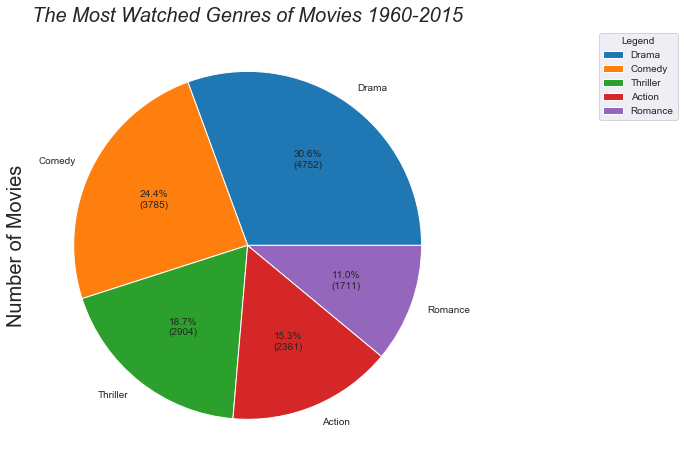

In [103]:
#Plotting the 5 most watched types of movies 
import matplotlib.pyplot as plt

def func(pct, allvals):        #Fuction copied from Matplotlib documentaion 'https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_and_donut_labels.html'
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

data=pd.Series(genres_list).value_counts()[:5]
data.plot.pie(figsize=(8,8), autopct=lambda pct: func(pct, data))
plt.title("The Most Watched Genres of Movies 1960-2015", fontsize=20, style='italic')
plt.ylabel("Number of Movies", fontsize=20)
plt.legend(loc='best', title='Legend', bbox_to_anchor=(1, 0, 0.5, 1))

>In order to check the genre of movies that had a lot of viewers per year, we created a function that takes 'year' as an argument and return a list of the popular genre of movies.

In [10]:
# Function that return the genre of the movie 
def genres_year (year):
    df_test= df_tmdb1[df_tmdb1.release_year == str(year)]
    list1 = []
    for genre in df_test['genres']:
        list1.extend(genre)
    return pd.Series(list1).value_counts()



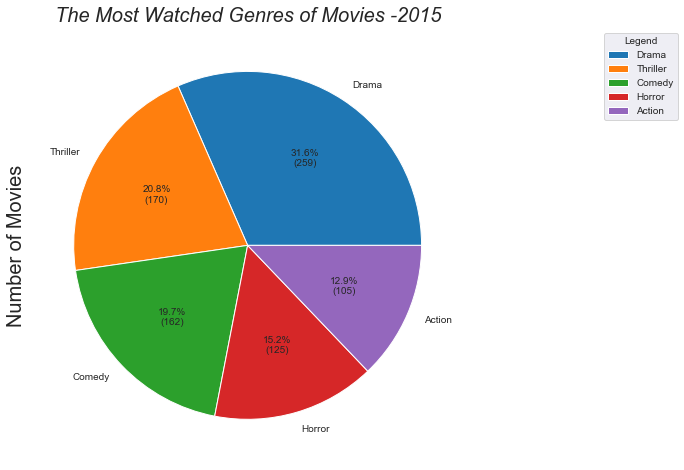

In [104]:
# The Most Watched Genres of Movies -2015
data_2015 = genres_year(2015)[:5]
data_2015.plot.pie(figsize=(8,8), autopct=lambda pct: func(pct, data_2015))
plt.title("The Most Watched Genres of Movies -2015", fontsize=20, style='italic')
plt.ylabel("Number of Movies", fontsize=20)
plt.legend(loc='best', title='Legend', bbox_to_anchor=(1, 0, 0.5, 1))

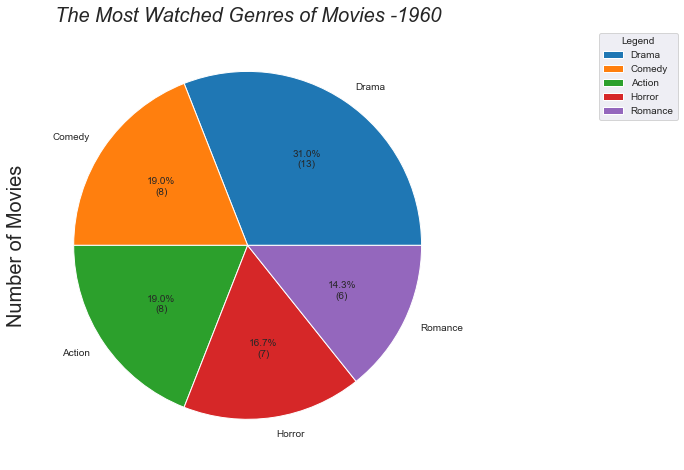

In [112]:
# The Most Watched Genres of Movies -1960
data_1960 = genres_year(1960)[:5]
data_1960.plot.pie(figsize=(8,8), autopct=lambda pct: func(pct, data_1960))
plt.title("The Most Watched Genres of Movies -1960", fontsize=20, style='italic')
plt.ylabel("Number of Movies", fontsize=20)
plt.legend(loc='best', title='Legend', bbox_to_anchor=(1, 0, 0.5, 1))

>As we can see (even comparing just two years is not a factor to make a judgment), **Drama** had been in the top list of the most-watched genres over the period between 1960 and 2015.

**Note** : In order to check the other years, you just need to change the 'year' in the function part (**data_1960 = genres_year(1960)[:5]**) of the cell above, and it will plot a pie chart, visualizing the top 5 genres of that year.

### Research Question 2 (what type of Movies is associated with the highest rating ?)
>To Answer this question, we will load up the cleaned data again and save it in a different data frame, so whatever processing will be made on this data won't affect the use of it to answer the rest of the question.

In [119]:
#we will start by loading up the data again and save it in 'df_votes' then, delet every column not needed for this EDA.
df_votes = pd.read_excel(r"C:\Users\hp\Desktop\Akram Folder\DATABASE\UDACITY\Project 2 - Analyze Experiment Results\TMDB_Clean_DATA.xlsx")
Columns_to_Drop = ['id', 'budget', 'revenue','cast', 'release_year']
#checking the result
df_votes.drop(Columns_to_Drop, axis=1, inplace=True)
df_votes.head(1)

,popularity,original_title,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09


>After keeping what we need in our dataframe, we separate the genres of the movies again, and then we will group the mean of 'vote_average' data by genres.

In [120]:
#separating the data in the column 'genres'
new_votes = pd.DataFrame(df_votes.genres.str.split('|').tolist(),index=df_votes.vote_average).stack().reset_index([0, 'vote_average'])
new_votes.columns=['vote_average', 'genres']
new_votes

,vote_average,genres
0,6.5,Action
1,6.5,Adventure
2,6.5,Science Fiction
3,6.5,Thriller
4,7.1,Action
...,...,...
26826,6.5,Mystery
26827,6.5,Comedy
26828,5.4,Action
26829,5.4,Comedy


In [121]:
#grouping the mean of 'votes_average' data by the column 'genres'
data_votes = new_votes.groupby('genres')['vote_average'].mean().round(2).sort_values(ascending=True)
data_votes

genres
Horror             5.34
Science Fiction    5.66
Thriller           5.75
Action             5.79
TV Movie           5.79
Fantasy            5.86
Comedy             5.90
Adventure          5.94
Mystery            5.95
Foreign            5.97
Family             5.99
Romance            6.04
Western            6.08
Crime              6.12
Drama              6.16
War                6.30
Animation          6.38
History            6.41
Music              6.48
Documentary        6.90
Name: vote_average, dtype: float64

Text(0, 0.5, 'genres')

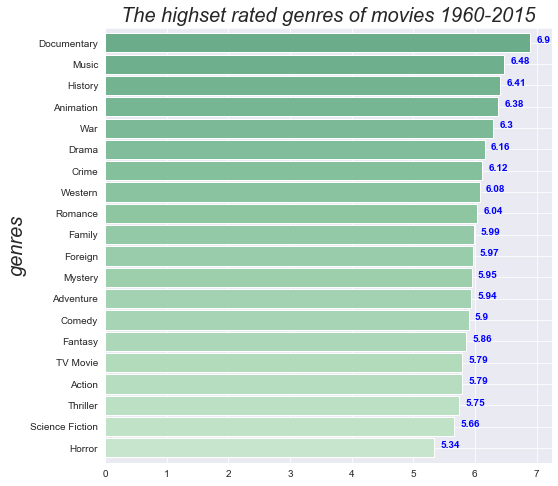

In [122]:
#visualizing the results using barh plot
data_votes.plot.barh(width=0.9,color=sns.color_palette("ch:2.5,-.2,dark=.3", 40), figsize=(8,8))
for ind, value in enumerate(new_votes.groupby('genres')['vote_average'].mean().round(2).sort_values(ascending=True).values): 
    plt.text(value + 0.1 , ind , str(value), color='blue', fontweight='bold')
plt.title("The highset rated genres of movies 1960-2015", fontsize=20, style='italic')
plt.ylabel("genres", fontsize=20, style='italic')

        

> * Using the average votes of the movies as a factor to rank the highest rated genre seems a little unfair since, after a quick inspection of the dataset, we noticed that some of the movies have a low number of votes and high score as average votes, meanwhile there'are other movies with a high number of votes but the average score of votes is lower than the previous category, so we don't think it is efficient to take the vote_average in consideration but calculating the **weighted rating** as explained below, will get us a better comparison of the genres, and the ranking will be more accurate.

### How do you calculate the rank of movies and TV shows on the Top Rated Movies and Top Rated TV Show lists?

The following formula is used to calculate the Top Rated 250 titles. This formula provides a true 'Bayesian estimate', which takes into account the number of votes each title has received, minimum votes required to be on the list, and the mean vote for all titles:

>> **weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C**

Where:

* R = average for the movie (mean) = (rating)
* v = number of votes for the movie = (votes)
* m = minimum votes required to be listed in the Top Rated list 
* C = the mean vote across the whole report

Link:  https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#

In [123]:
# Calculatin the mean of 'vote_average'
C= df_tmdb1['vote_average'].mean()
#In order to be in the chart the movie need to have votes more than 95% of the list
m= df_tmdb1['vote_count'].quantile(0.95)
C,m

(5.967548992291278, 1034.3999999999978)

> * So the mean of average votes is almost 6 on a scale of 10. 
> * we opted to chose 95% as the threshold for the value of minimum votes required to be listed in the Top Rated list 'm', that means, only movies with a number of votes higher than the 95% of the list will be in the list. The purpose is to minimize the number of movies on the list since we are looking for the top genres based on the higher votes.

In [124]:
#Storing the filterd data in new data frame
wr_votes = df_votes[df_votes.vote_count >= m] 
wr_votes.shape

(539, 8)

In [125]:
#weighted rating function 
def weighted_rating_IMDB(df, m=m, C=C):
    v = df['vote_count']
    R = df['vote_average']
    return round((v/(v+m) * R) + (m/(m+v) * C), 2)

In [126]:
# We will add a new column to the new dataframe, so we can compare the votes to the genres
wr_votes['weighted_rating'] = wr_votes.apply(weighted_rating_IMDB, axis= 1)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


>We can Also check which movie is associated with the highest rating, and below is the result. As we can see, **The Shawshank Redemption** has the highest rating of the dataset.

In [127]:
#The top 10 of the highest-rated movies between 1960 and 2015
wr_votes.sort_values('weighted_rating', ascending=False).head(10)

,popularity,original_title,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,weighted_rating
4127,7.192039,The Shawshank Redemption,142,Drama|Crime,5754,8.4,3.677779e+07,4.169346e+07,8.03
2838,8.466668,The Dark Knight,152,Drama|Action|Crime|Thriller,8432,8.1,1.873655e+08,1.014733e+09,7.87
7192,5.738034,The Godfather,175,Drama|Crime,3970,8.3,3.128737e+07,1.277914e+09,7.82
2373,8.947905,Fight Club,139,Drama,5923,8.1,8.247033e+07,1.320229e+08,7.78
4126,8.093754,Pulp Fiction,154,Thriller|Crime,5343,8.1,1.176889e+07,3.147131e+08,7.75
4128,6.715966,Forrest Gump,142,Comedy|Drama|Romance,4856,8.1,8.091114e+07,9.973333e+08,7.73
620,24.949134,Interstellar,169,Adventure|Drama|Science Fiction,6498,8.0,1.519800e+08,5.726906e+08,7.72
1891,9.363643,Inception,148,Action|Thriller|Science Fiction|Mystery|Adventure,9767,7.9,1.600000e+08,8.255000e+08,7.71
621,14.311205,Guardians of the Galaxy,121,Action|Science Fiction|Adventure,5612,7.9,1.565855e+08,7.122911e+08,7.60
4886,7.122455,The Lord of the Rings: The Return of the King,201,Adventure|Fantasy|Action,5636,7.9,1.114231e+08,1.326278e+09,7.60


In [128]:
# Spliting the data in 'genres' column in order to compare it to the 'weighted_rating'
new_votes2 = pd.DataFrame(wr_votes.genres.str.split('|').tolist(),index=wr_votes.weighted_rating).stack().reset_index([0, 'weighted_rating'])
new_votes2.columns=['weighted_rating', 'genres']
new_votes2

,weighted_rating,genres
0,6.42,Action
1,6.42,Adventure
2,6.42,Science Fiction
3,6.42,Thriller
4,6.94,Action
...,...,...
1599,6.29,Action
1600,6.29,Romance
1601,6.61,Drama
1602,6.61,Horror


In [129]:
#grouping the mean of 'weighted_rating' data by the column 'genres'
data_votes2 = new_votes2.groupby('genres')['weighted_rating'].mean().round(2).sort_values(ascending=True)

Text(0, 0.5, 'genres')

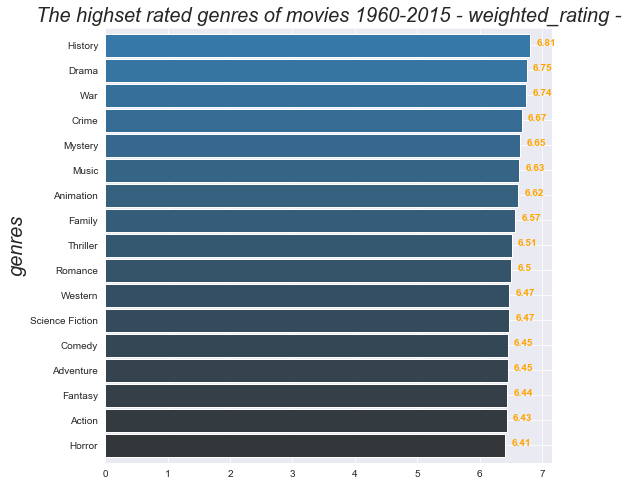

In [130]:
#visualization of the data using the barh plot
data_votes2.plot.barh(width=0.9,color=sns.color_palette("Blues_d", 40), figsize=(8,8))
for ind, value in enumerate(new_votes2.groupby('genres')['weighted_rating'].mean().round(2).sort_values(ascending=True).values): 
    plt.text(value +0.1, ind , str(value), color='orange', fontweight='bold')
plt.title("The highset rated genres of movies 1960-2015 - weighted_rating -", fontsize=20, style='italic')
plt.ylabel("genres", fontsize=20, style='italic')

> * We personally thought that **Drama** will the highest rated genre but the **DATA** had a different say. So **History** is the highest rated genre by a score of 6.81/10, followed by **Drama** by a score of 6.75/10 and then in the third-place **War** scoring 6.74/10. 
> * The result obtained may be explained by the large period(1960-2015 (55 years)) we use to do our analysis, we're assuming that back the days the audience had a different taste of movies than the actual one. 

### Research Question  (What properties are associated with movies that have the highest revenue ?)

>First of all, let's start by adding a column that shows the profit of each movie based on the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
we will use the last data frame created **'wr_votes'** to compare all the properties of the top 10 movies.

In [158]:
# getting the Profit by subtracting the budget from the revenue
wr_votes['profit'] = wr_votes['revenue_adj'] - wr_votes['budget_adj']
#Checking the result (sorted in a descending way)
wr_votes.sort_values('profit', ascending=False).head(10)

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,popularity,original_title,runtime,genres,vote_count,vote_average,budget_adj,revenue_adj,weighted_rating,profit
1307,12.037933,Star Wars,121,Adventure|Action|Science Fiction,4428,7.9,3.957559e+07,2.789712e+09,7.53,2.750137e+09
1363,9.432768,Avatar,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2.408869e+08,2.827124e+09,6.98,2.586237e+09
5168,4.355219,Titanic,194,Drama|Romance|Thriller,4654,7.3,2.716921e+08,2.506406e+09,7.06,2.234714e+09
10497,2.010733,The Exorcist,122,Drama|Horror|Thriller,1113,7.2,3.928928e+07,2.167325e+09,6.61,2.128036e+09
9711,2.563191,Jaws,124,Horror|Thriller|Adventure,1415,7.3,2.836275e+07,1.907006e+09,6.74,1.878643e+09
8802,2.900556,E.T. the Extra-Terrestrial,115,Science Fiction|Adventure|Family|Fantasy,1830,7.2,2.372625e+07,1.791694e+09,6.75,1.767968e+09
3,11.173104,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,1.839999e+08,1.902723e+09,7.25,1.718723e+09
7232,5.488441,The Empire Strikes Back,124,Adventure|Action|Science Fiction,3954,8.0,4.762866e+07,1.424626e+09,7.58,1.376998e+09
10128,2.204926,Jurassic Park,127,Adventure|Science Fiction,3169,7.4,9.509661e+07,1.388863e+09,7.05,1.293767e+09
0,32.985763,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,1.379999e+08,1.392446e+09,6.42,1.254446e+09


>From the table above we can conclude that the votes are not a factor in deciding if the movie will make a good profit or not, but in the other side, we can see that the genre has an effect on the profit, **Action** Movies showed that they're profitable, followed by the **Comedy** movies. 
> Let us now see how the other properties have an effect on the profitibality of each movie, and for that we will use the ploting option of matplotlib and seaborn to visualize the relationships between **profit** and **runtime**, **popularity**, and **weighted_rating** .

Text(0.5, 0, 'Runtime')

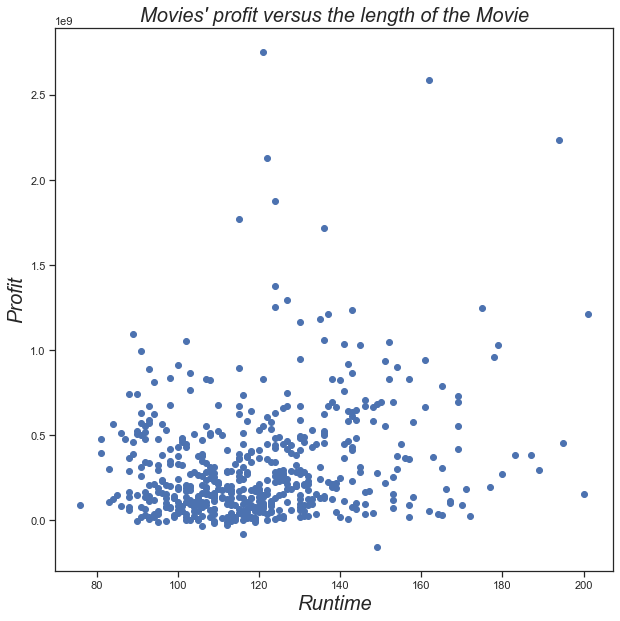

In [207]:
##visualization of the runtime vs profit data using the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(x=wr_votes['runtime'], y=wr_votes['profit'])
plt.title("Movies' profit versus the length of the Movie", fontsize=20, style='italic')
plt.ylabel("Profit", fontsize=20, style='italic')
plt.xlabel("Runtime", fontsize=20, style='italic')

> * As seen from the scatter plot, the dataset contains movies of different lengths, mostly focused between **90min**and **140min**, the movies in this section of the data are generating a profit that doesn't exceed 0.75 Billion dollars, if it's not a negative number (Losing Money). 
> * We can say based on the graph, that the length of the movies is not the main factor in determining the profitability of the movie, but we can see clearly that all the movies that exceeded the one billion dollars line have a length of **110min** or more.

Text(0.5, 0, 'popularity')

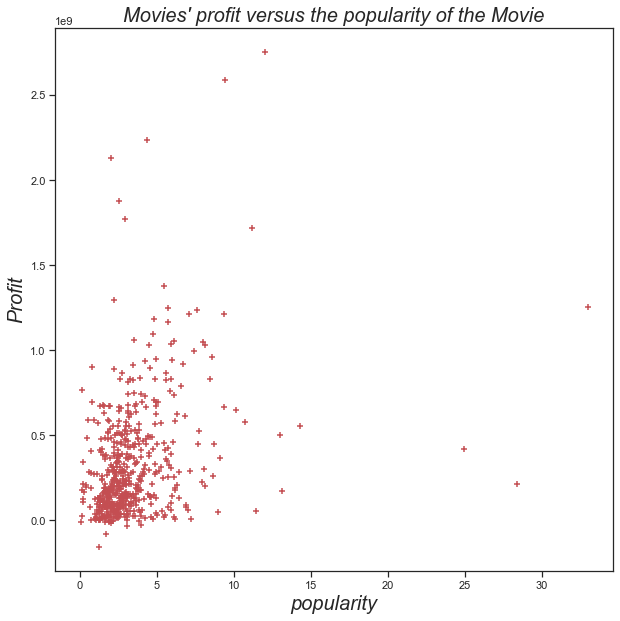

In [208]:
#visualization of the popularity vs profit data using the scatter plot
plt.figure(figsize=(10, 10))
plt.scatter(x=round(wr_votes['popularity'], 2), y=wr_votes['profit'], color='r', marker='+')
plt.title("Movies' profit versus the popularity of the Movie", fontsize=20, style='italic')
plt.ylabel("Profit", fontsize=20, style='italic')
plt.xlabel("popularity", fontsize=20, style='italic')

In [210]:
wr_votes['popularity'].max()

32.985763

> * It appears that comparing the two columns **'popularity'** and **'profit'** showed a concentration of data on one side of the plotted scatter chart.
> * Surprisingly, we can conclude that the movies marked as **less popular** are the ones that made a profit. But at the same time, based on the chart, we notice that most of the movies in the dataset have a score between **0** and **10**, knowing that the max value in **'popularity'** column is **32.98**. The popularity score is calculated based on the following factors:

>>**Movies**
>> * Number of votes for the day
>> * Number of views for the day
>> * Number of users who marked it as a "favorite" for the day
>> * Number of users who added it to their "watchlist" for the day
>> * Release date
>> * Number of total votes
>> * Previous days score
>source: https://developers.themoviedb.org/3/getting-started/popularity

> **The question to ask is, how accurate is this population score, and what is the scale?**




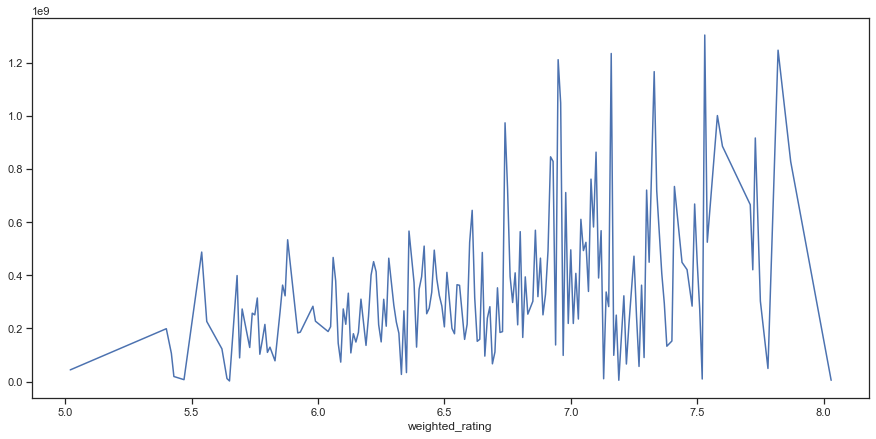

In [209]:
##visualization of the data weighted_rating vs the mean value of the profit using AxesSubplot
fig, ax = plt.subplots(figsize=(15,7))
wr_votes.groupby('weighted_rating')['profit'].mean()[:10].plot(ax=ax)

>From the chart, it is clear that high rated movies are most likely to make a profit, which totally makes sense since more votes mean more viewers, and more viewers means more profit.

### Research Question 3 (which Actor has the most number of appearances ?)


In [17]:
#changing the data type of the column 'cast' to a list
df_tmdb1['cast'] = df_tmdb1.cast.apply(lambda x: x[:].split('|'))

In [18]:
#checking the results 
df_tmdb1.cast[0]

['Chris Pratt',
 'Bryce Dallas Howard',
 'Irrfan Khan',
 "Vincent D'Onofrio",
 'Nick Robinson']

In [19]:
#cast_list will gather every actor's name mentioned in the dataset
cast_list = []
for actor in df_tmdb1['cast']:
    cast_list.extend(actor)
print(cast_list)

['Chris Pratt', 'Bryce Dallas Howard', 'Irrfan Khan', "Vincent D'Onofrio", 'Nick Robinson', 'Tom Hardy', 'Charlize Theron', 'Hugh Keays-Byrne', 'Nicholas Hoult', 'Josh Helman', 'Shailene Woodley', 'Theo James', 'Kate Winslet', 'Ansel Elgort', 'Miles Teller', 'Harrison Ford', 'Mark Hamill', 'Carrie Fisher', 'Adam Driver', 'Daisy Ridley', 'Vin Diesel', 'Paul Walker', 'Jason Statham', 'Michelle Rodriguez', 'Dwayne Johnson', 'Leonardo DiCaprio', 'Tom Hardy', 'Will Poulter', 'Domhnall Gleeson', 'Paul Anderson', 'Arnold Schwarzenegger', 'Jason Clarke', 'Emilia Clarke', 'Jai Courtney', 'J.K. Simmons', 'Matt Damon', 'Jessica Chastain', 'Kristen Wiig', 'Jeff Daniels', 'Michael PeÃ±a', 'Sandra Bullock', 'Jon Hamm', 'Michael Keaton', 'Allison Janney', 'Steve Coogan', 'Amy Poehler', 'Phyllis Smith', 'Richard Kind', 'Bill Hader', 'Lewis Black', 'Daniel Craig', 'Christoph Waltz', 'LÃ©a Seydoux', 'Ralph Fiennes', 'Monica Bellucci', 'Mila Kunis', 'Channing Tatum', 'Sean Bean', 'Eddie Redmayne', 'Dougl

In [117]:
# Actors with the highest number of appearances are as following:
pd.Series(cast_list).value_counts()

Robert De Niro          72
Samuel L. Jackson       71
Bruce Willis            62
Nicolas Cage            61
Michael Caine           53
                        ..
Christopher Buchholz     1
Michael Coleman          1
Lois Maxwell             1
Knut Joner               1
Gethin Anthony           1
Length: 18983, dtype: int64

Text(0, 0.5, 'Actors')

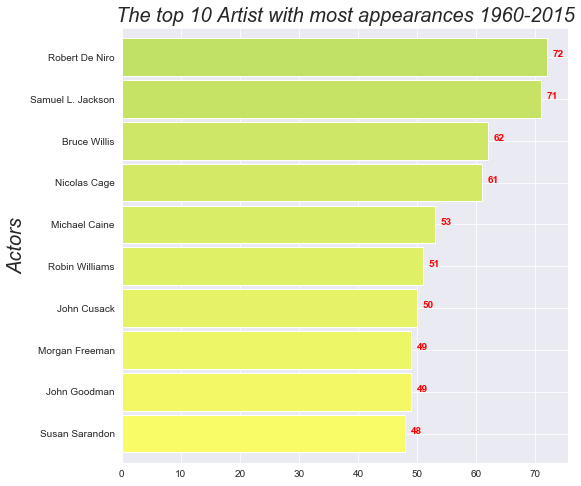

In [118]:
#Visualization of the data 
data_cast=pd.Series(cast_list).value_counts()[:10].sort_values(ascending=True)
data_cast.plot.barh(width=0.9,color=sns.color_palette("summer_r", 40), figsize=(8,8))
for ind, value in enumerate(pd.Series(cast_list).value_counts()[:10].sort_values(ascending=True).values): 
    plt.text(value + 1, ind , str(value), color='red', fontweight='bold')
plt.title("The top 10 Artist with most appearances 1960-2015", fontsize=20, style='italic')
plt.ylabel("Actors", fontsize=20, style='italic')



>No surprise that one of our favorite actors appears in many movies, **Robert De Niro** appeared in 72 movies in the period between 1960 and 2015, followed by another great actor **Samuel L. Jackson** that was in 71 movies during the same period.

<a id='conclusions'></a>
## Conclusions

> As summary of our analysis on the dataset collected between 1960 and 2015 :

>>* **Drama** has been the most watched type of movies 
>>* **The Shawshank Redemption** is the highest rated movie 
>>* **Robert De Niro** has the highest number of appearances in movies 
>>* **Action** and **Comedy** tend to be the most profitable genre of movies
>>* **Votes** don't affect the profitability of the movie

>The finding mentioned above is basic to understand what factors can play major roles in either recommending a movie or anticipating if a movie will be profitable or not, in addition to other analytics that required statistical tests. However, some limitations wereobserved, we can mention the lack of information about certain columns,  like 'popularity' that we don't how it is calculated neither what is the scale; knowing such as information would help us to get more accurate results and make better conclusions.


